# AirplaneHubs Appendix
Dieses Notebook behandelt folgende Fragen in Bezug zum Datensetgestellung. Es sind teilweise dieselben Plots wie im Hauptfile "DataStory" zur Vollständigkeitshalber aufgeführt. Im unteren Teil sind weitere Plots zum Verständnis der DataStory aufgeführt. 
- Welche Flughäfen weisen einen hohen Flugverkehr auf?                            -> Verkehr an Flughäfen
- Welche Flughäfen weisen die meisten Verbindungen auf?                           -> Verkehr an Flughäfen
- Welche Flughäfen können als Verkehrsknotenpunkt identifiziert werden?           -> Verkehr an Flughäfen
- Welches sind die längsten Distanzen die zurückgelegt werden?                    -> Distanzen
- Welche Unterschiede in den Flugbewegungen sind im Sommer zum Frühling zu sehen? -> Unterschied Mai Sept

In [1]:
import datastory_plots_appendix as ap
import datastory_plots as dsp
import descriptive_stats as ds
df_airports, df_flights = dsp.load_data("data/preprocessed/airports.csv", "data/preprocessed/flights_100mb.csv")

### Verkehr an Flughäfen
Als erstes möchten wir bestimmen, welche Flughäfen den höchsten Flugverkehr aufweisen. Dafür untersuchen wir das Datenset sortiert nach allen Takeoffs sowie Landings. 

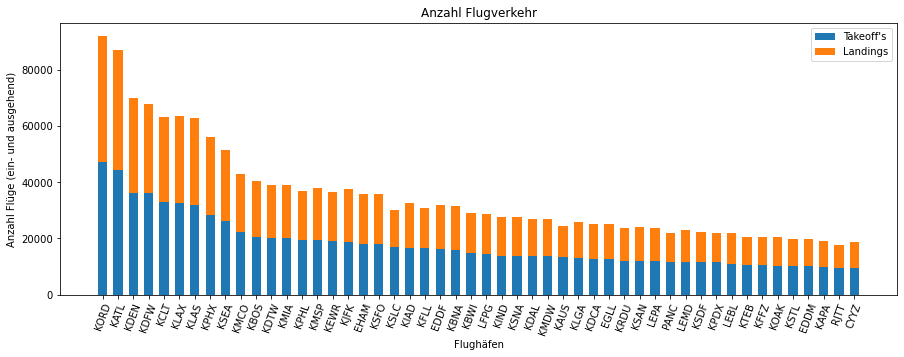

In [2]:
fig = ap.distribution_takeoff_landings(df_airports)

- USA dominitiert weltweiten Flugverkehr
- Regionen müssen unterschieden werden.

[Text(0.5, 1.0, 'Flugverkehr nach Region'),
 Text(0.5, 0, 'Anzahl Flugverbindungen'),
 Text(0, 0.5, 'Regionen')]

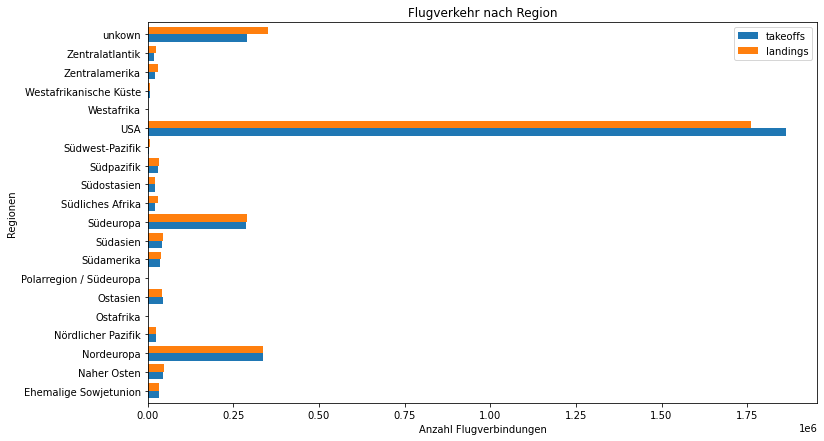

In [3]:
dsp.flight_connections(df_airports)

- Unterschiede der Regionen gross.
- Filterungen jeweils pro Region kalkulieren und filtern

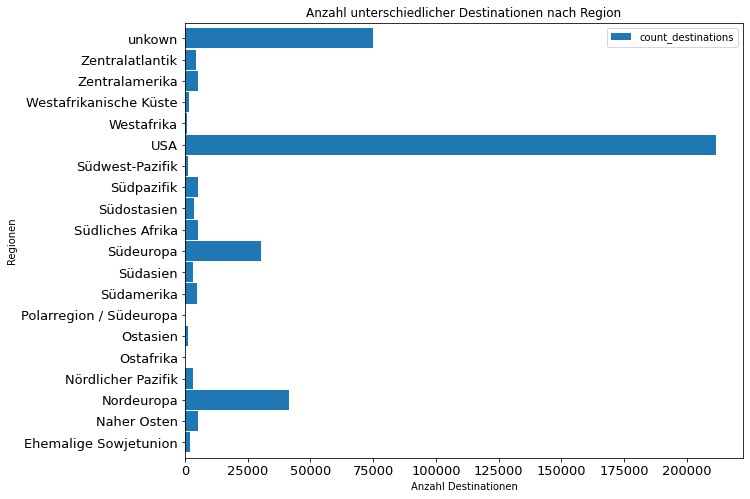

In [4]:
fig = ds.show_stats_destinations(df_airports)

- Vielfalt der Destinationen entspricht Anzahl Verbindungen
- Regionaler Unterschied hoch.

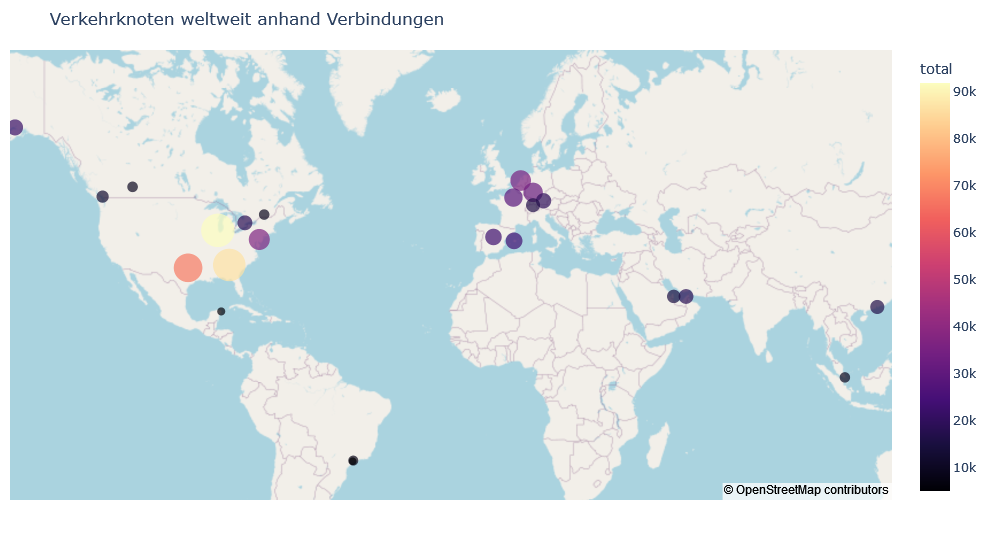

In [5]:
ap.traffic_map_typ(df_airports, df_flights)

Wie in der Datastory angedeutet, ergibt die erneute Filterung nach Typ ein noch genaueres Bild von kontinentalen Grossstädte. Die Unterschiede sind jedoch zu klein um diese extra anhand des Types zu filtern.

Um noch weitere und bessere Analysen zu generieren, wären Daten zum Land sowie des Passagieraufkommens notwendig wobei unterschieden werden kann in Transit-Flüge und normale Flüge. 

Wie im folgenden Abschnitt aufgezeigt wird, können auch kleine Flughäfen grosse Distanzen besitzen aufgrund des Ortes oder spezieller Nachfrage. 

### Flugdistanzen kleiner Flughäfen

Längste Flüge kleiner Flughäfen: 


origin destination         day      distance  counts
0   KGPM        VTBU  2021-05-27  14631.334293       1
1   KVCV        WSSS  2021-05-30  14152.335426       1
2   VTBT        NJ72  2021-05-16  14050.923104       1
3   FADR        KMQJ  2021-09-03  13855.031704       1
4   RPLS        KJFK  2021-05-29  13716.081772       1

Kleine Flughäfen mit längsten Distanzen: 


name municipality            region  total
2737                 Estes Airport     Florence            unkown   3559
3675              Skyhaven Airport      Houston            unkown   5701
4192  Monterey Bay Academy Airport  Watsonville            unkown    907
6055            Dunnottar Airfield    Dunnottar  Südliches Afrika     22
6081          Tedderfield Air Park  Tedderfield  Südliches Afrika    171

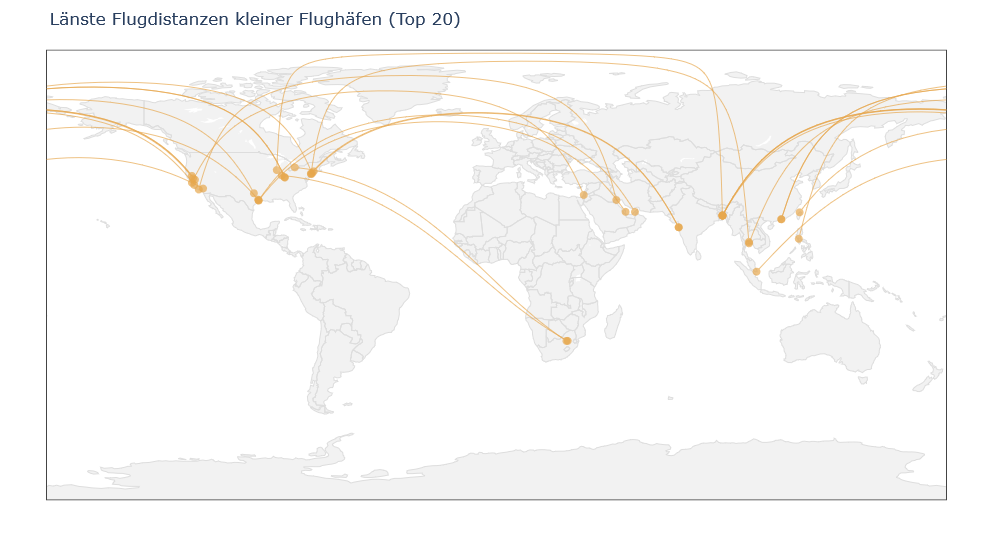

In [6]:
fig = ap.distance_of_small_airports(df_airports, df_flights)
fig.show()

### Unterschied Mai und September
Wie bereits bei Beginn kurz angedeutet, ist der Flugverkehr im September um rund 10'000 Verbindungen höher als im Mai. 



<AxesSubplot:xlabel='month', ylabel='count'>

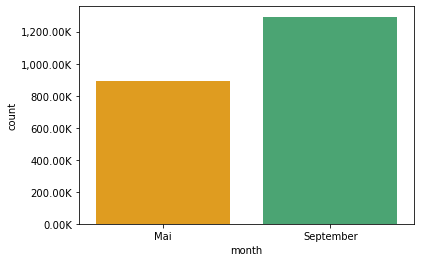

In [7]:
ap.difference_between_months(df_flights)

Stellen wir die Anzahl Verbindungen, Destinationen und Distanz der Flughäfen im Zeitraum Mai und September gegenüber, ergibt dies folgende Visualisierung:

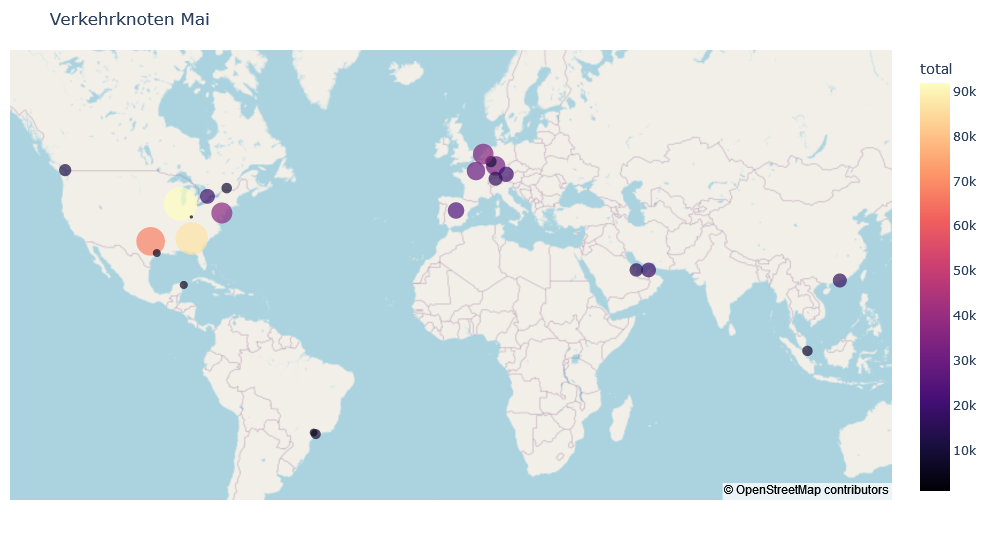

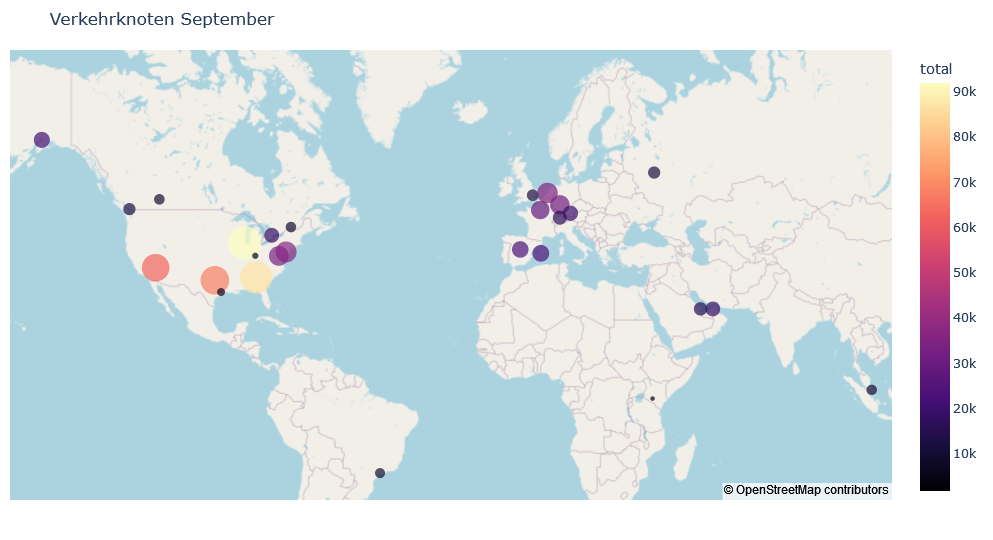

In [9]:
fig_mai, fig_sep = ap.difference_months_map(df_airports, df_flights)
fig_mai.show()
fig_sep.show()

Es ist gut zu erkennen, dass bis auf die saisonalen Airports wie Mallorca nur zur Ferienzeit auftritt. Hingegen Alaska ist in beiden Zeiträumen mit vielen Verbindungen dargestellt weshalb dies ein Knotenpunkt sein dürfte hingegen Mallorca. Ausserdem weisst Australien im Mai generell ein höheres Aufkommen an Flugverbindungen dar. Zur Analyse von Verkehrsknoten ist der Unterschied zum Flughafen Sydney jedoch zu gross. 